In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\rohit\AppData\Local\Temp\ipykernel_11156\347984750.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

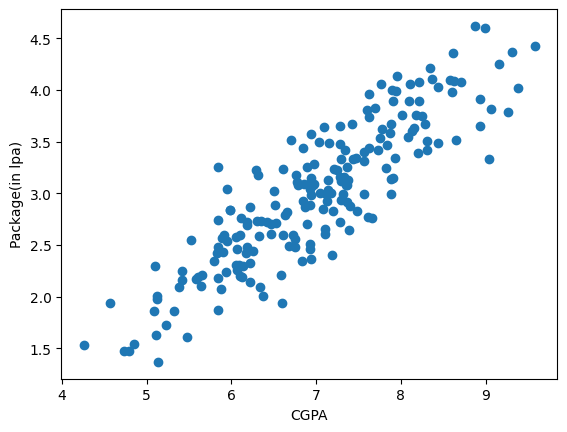

In [3]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

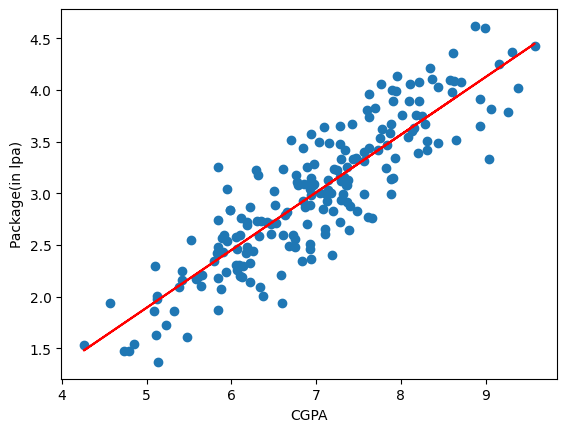

In [10]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [12]:
y_pred = lr.predict(X_test)
print("MAE",mean_absolute_error(Y_test,y_pred))
print("MSE",mean_squared_error(Y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R2 score: ",r2_score(Y_test,y_pred))

MAE 0.2884710931878175
MSE 0.12129235313495527
RMSE 0.34827051717731616
R2 score:  0.780730147510384


In [13]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa','iq','package']]

In [14]:
new_df2.sample(5)

,cgpa,iq,package
76,6.94,2.75,3.15
56,5.84,2.04,2.74
35,6.87,2.67,2.87
12,8.94,4.35,3.65
50,9.58,4.23,4.43


Text(0, 0.5, 'Package(in lpa)')

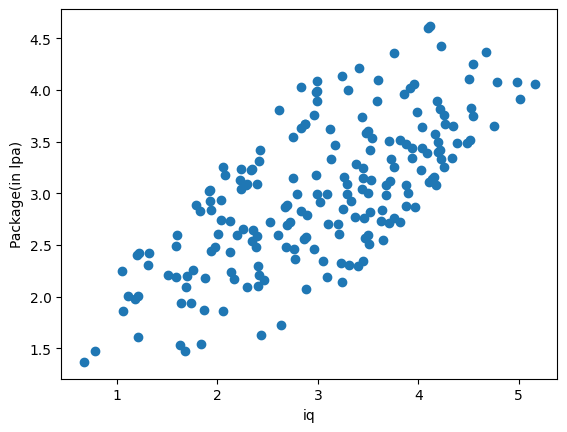

In [16]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [18]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.8055685688482661
